# Логистическая регрессия (Logistic Regression)

---

**Источники:**


[Логистическая регрессия](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

[Логистическая регрессия (Logistic Regression)](https://wiki.loginom.ru/articles/logistic-regression.html)

[Multinomial Logistic Regression With Python](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/)

[Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

[Multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression#:~:text=In%20statistics%2C%20multinomial%20logistic%20regression,than%20two%20possible%20discrete%20outcomes.)

---

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__

'0.24.1'

## Загрузка данных

[Источник (CustomerChurnRate)](https://www.kaggle.com/gangliu/customerchurnrate).

In [8]:
df = pd.read_csv('./../../data/ChurnData.csv')

# показать все колонки
pd.options.display.max_columns = None

# изменить формат отображения с помощью средства форматирования
# (float без E, а 2 знаков после запятой)
# (для удобства чтения)
pd.options.display.float_format = '{:.2f}'.format

# отобразить первые 5 и последние 5 строк
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.00,33.00,7.00,136.00,5.00,5.00,0.00,1.00,1.00,4.40,20.75,0.00,15.25,35.70,42.00,211.45,125.00,1.00,1.00,0.00,1.00,1.00,0.00,1.48,3.03,4.91,4.00,1.00
1,33.00,33.00,12.00,33.00,2.00,0.00,0.00,0.00,0.00,9.45,0.00,0.00,0.00,0.00,288.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.25,3.24,3.50,1.00,1.00
2,23.00,30.00,9.00,30.00,1.00,2.00,0.00,0.00,0.00,6.30,0.00,0.00,0.00,0.00,157.05,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.84,3.24,3.40,3.00,0.00
3,38.00,35.00,5.00,76.00,2.00,10.00,1.00,1.00,1.00,6.05,45.00,50.10,23.25,64.90,239.55,1873.05,880.00,1.00,1.00,1.00,1.00,1.00,1.00,1.80,3.81,4.33,4.00,0.00
4,7.00,35.00,14.00,80.00,2.00,15.00,0.00,1.00,0.00,7.10,22.00,0.00,23.75,0.00,47.45,166.10,145.00,1.00,0.00,0.00,1.00,1.00,0.00,1.96,3.09,4.38,3.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.00,44.00,24.00,83.00,1.00,23.00,0.00,1.00,0.00,17.35,24.50,0.00,14.25,0.00,973.10,1343.50,720.00,0.00,0.00,0.00,0.00,1.00,0.00,2.85,3.20,4.42,3.00,0.00
196,34.00,23.00,3.00,24.00,1.00,7.00,0.00,1.00,0.00,6.00,28.00,0.00,12.75,0.00,203.25,959.40,435.00,0.00,0.00,0.00,1.00,1.00,0.00,1.79,3.33,3.18,3.00,0.00
197,6.00,32.00,10.00,47.00,1.00,10.00,0.00,1.00,0.00,3.85,23.75,0.00,12.50,0.00,29.90,128.45,80.00,0.00,0.00,0.00,1.00,1.00,0.00,1.35,3.17,3.85,3.00,0.00
198,24.00,30.00,0.00,25.00,4.00,5.00,0.00,1.00,1.00,8.70,47.75,0.00,32.75,64.00,186.60,1152.90,780.00,1.00,1.00,1.00,1.00,1.00,1.00,2.16,3.87,3.22,4.00,1.00


In [9]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',  'callcard', 'wireless','churn']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


## Вероятность (Probability)

TODO

## Различия между Линейной (Linear) и Логистической (Logistic) регрессией (Regression)


<img src="images/linear_vs_logistic_regression_2.png" width="600">


В то время как **линейная регрессия** подходит для оценки **непрерывных значений** (например, оценок цены дома), это не лучший инструмент для прогнозирования класса, то есть **дискретных значений**.

Чтобы **оценить класс**, нужно какое-то руководство в том, какой класс будет наиболее вероятным для этого набора признаков. Для этого можно использовать **логистическую регрессию**.

**Логистическая регрессия** - это **разновидность линейной регрессии**, полезная, когда наблюдаемая зависимая переменная $y$ является категориальной. 

**Логистическая регрессия** соответствует специальной s-образной кривой, взяв линейную регрессию и преобразовав числовую оценку в вероятность с помощью следующей функции, которая называется сигмоидной функцией $\sigma$:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Или:
$$
Probability\space of \space Class_1 =  P(y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

В этом уравнении ${\theta^TX}$ - это результат регрессии (сумма переменных, взвешенных коэффициентами), `exp` - экспоненциальная функция, а $\sigma(\theta^TX)$ - сигмоида или [логистическая функция](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%83%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5), также называется логистической кривой. Это обычная S-образная форма (сигмовидная кривая).

<img src="images/linear_vs_logistic_regression_1.png" width="600">


Итак, вкратце, логистическая регрессия передает входные данные через логистическую / сигмоиду, но затем обрабатывает результат как вероятность:

<img src="images/log_regr_prob.png" width="400">

**Логистическая регрессия выдаёт ответ в виде вероятности бинарного события (1 или 0).**

Эта модель применяется для решения задач классификации — объект $x$ можно отнести к классу $y=1$, если предсказанная моделью вероятность $P\{y=1|x\}>0.5$, и к классу $y=0$ в противном случае.
А логистическая регрессия **лучшим образом подходит, когда выходная переменная принимает только два значения**.

Цель алгоритма **логистической регрессии** - найти наилучшие параметры $\theta$ для $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$ таким образом, чтобы наилучшим образом предсказать класс каждого случая.

**Для улучшения обобщающей способности получающейся модели, то есть уменьшения эффекта переобучения, на практике часто рассматривается логистическая регрессия с регуляризацией.**

<img src="images/2d_log_reg.png" width="400">

## Бинарная классификация (ровно 2 класса)

### Предварительная обработка (pre-processing) и выбор (selection) данных

In [10]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(df['churn'])

In [11]:
from sklearn import preprocessing

# нормализация
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Обучение модели (Train)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [14]:
y_predicted = model.predict(X_test)
y_predicted

array([0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0.])

In [15]:
# получить вероятности
y_predicted_prob = model.predict_proba(X_test)
y_predicted_prob

array([[0.5862587 , 0.4137413 ],
       [0.49465581, 0.50534419],
       [0.45932668, 0.54067332],
       [0.51345216, 0.48654784],
       [0.5417615 , 0.4582385 ],
       [0.49240469, 0.50759531],
       [0.47032563, 0.52967437],
       [0.51872717, 0.48127283],
       [0.39225893, 0.60774107],
       [0.45682503, 0.54317497],
       [0.57076645, 0.42923355],
       [0.75767701, 0.24232299],
       [0.53907823, 0.46092177],
       [0.65176321, 0.34823679],
       [0.5709428 , 0.4290572 ],
       [0.72820573, 0.27179427],
       [0.56138775, 0.43861225],
       [0.53086271, 0.46913729],
       [0.45224233, 0.54775767],
       [0.71479525, 0.28520475],
       [0.47845779, 0.52154221],
       [0.42598256, 0.57401744],
       [0.4465493 , 0.5534507 ],
       [0.46245438, 0.53754562],
       [0.57551773, 0.42448227],
       [0.43717559, 0.56282441],
       [0.48227469, 0.51772531],
       [0.46961714, 0.53038286],
       [0.4969288 , 0.5030712 ],
       [0.58020843, 0.41979157],
       [0.

### Оценка качества модели (Evaluation)

####  Матрица ошибок (confusion matrix)

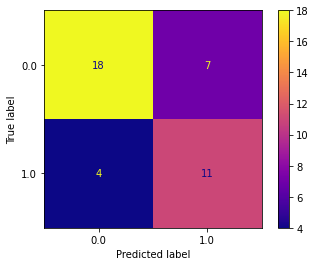

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap='plasma')  

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        25
         1.0       0.61      0.73      0.67        15

    accuracy                           0.73        40
   macro avg       0.71      0.73      0.72        40
weighted avg       0.74      0.72      0.73        40



#### log loss

In [18]:
from sklearn.metrics import log_loss
log_loss(y_test, y_predicted_prob)

0.6052882939554263

## Мультиклассовая классификация (> 2 классов) / Multinomial logistic regression

Полиномиальная логистическая регрессия — это расширение логистической регрессии для мультиклассовой классификации.

По умолчанию логистическая регрессия не может использоваться для задач классификации, которые имеют более двух меток классов (мультиклассовая классификация).


В `sklearn` реализации в случае нескольких классов алгоритм обучения использует схему **one-vs-rest (OvR)**, если опция `multi_class `установлена на `ovr`, и использует потерю кросс-энтропии (cross-entropy loss), если опция `multi_class` установлена на `multinomial`. По умолчанию установлен вариант `auto`, в таком случае выбирается `ovr`, если данные являются двоичными, или если solver = `liblinear`, и в противном случае выбирает `multinomial`.

Если выбран вариант `ovr`, то для каждой метки подходит двоичная задача. Для `multinomial` функция потерь (loss) полином, соответствующие всему распределению вероятностей, даже если данные являются двоичными. Значение `multinomial` недоступно, если solver = `liblinear`.

### Предварительная обработка (pre-processing) и выбор (selection) данных

In [19]:
df.ed.value_counts()

4.00    59
2.00    48
1.00    40
3.00    36
5.00    17
Name: ed, dtype: int64

In [20]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'churn', 'employ', 'equip']])
y = np.asarray(df['ed'])

In [21]:
from sklearn import preprocessing

# нормализация
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.56469673,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061,  1.56469673,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -0.63910148,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.63910148,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.63910148,
         0.53441472, -0.85972695]])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Обучение модели (Train)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [24]:
y_predicted = model.predict(X_test)
y_predicted

array([4., 2., 4., 2., 1., 4., 1., 4., 1., 2., 2., 2., 1., 1., 4., 5., 4.,
       1., 1., 1., 1., 4., 4., 2., 1., 1., 4., 4., 4., 2., 1., 2., 2., 1.,
       2., 2., 4., 2., 4., 2.])

In [25]:
# получить вероятности
y_predicted_prob = model.predict_proba(X_test)
y_predicted_prob

array([[0.17104502, 0.19977776, 0.20468063, 0.23378236, 0.19071423],
       [0.19204248, 0.23067691, 0.20830136, 0.2017868 , 0.16719244],
       [0.16053193, 0.20221629, 0.20687576, 0.23791105, 0.19246496],
       [0.19355016, 0.22488806, 0.20741145, 0.20186283, 0.17228751],
       [0.22918934, 0.20419075, 0.19609921, 0.18746013, 0.18306057],
       [0.15908416, 0.18564451, 0.19743639, 0.26203139, 0.19580354],
       [0.23977767, 0.21260255, 0.191711  , 0.17275442, 0.18315436],
       [0.19442411, 0.20561062, 0.1971444 , 0.22461161, 0.17820926],
       [0.22874619, 0.21386259, 0.19640018, 0.18227129, 0.17871976],
       [0.20229587, 0.22243194, 0.20430535, 0.1958465 , 0.17512034],
       [0.20199977, 0.22856792, 0.2045404 , 0.19535873, 0.16953318],
       [0.20975135, 0.22100736, 0.20266031, 0.1935953 , 0.17298568],
       [0.24442816, 0.20958768, 0.19332201, 0.17280567, 0.17985648],
       [0.23374183, 0.20912263, 0.19436885, 0.17857806, 0.18418863],
       [0.17107798, 0.17966316, 0.

### Оценка качества модели (Evaluation)

####  Матрица ошибок (confusion matrix)

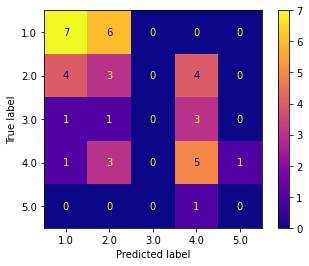

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap='plasma')  

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         1.0       0.54      0.54      0.54        13
         2.0       0.23      0.27      0.25        11
         3.0       0.00      0.00      0.00         5
         4.0       0.38      0.50      0.43        10
         5.0       0.00      0.00      0.00         1

    accuracy                           0.38        40
   macro avg       0.23      0.26      0.24        40
weighted avg       0.33      0.38      0.35        40



/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### log loss

In [28]:
from sklearn.metrics import log_loss
log_loss(y_test, y_predicted_prob)

1.564175207450456